In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
# Code starts here
train = pd.read_csv("train.csv")
train.columns
print(train.shape)

corr = train.corr()
corr

# Code ends here.

(4781, 17)


,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Id,1.000000,0.075467,-0.082662,-0.096217,0.015201,0.034281,0.297354,0.075244,0.002907,0.088199,0.075567,-0.017175,0.104215,-0.194283,0.017536,-0.104060,0.020192
Rooms,0.075467,1.000000,-0.590817,0.523579,-0.053525,-0.029506,0.289699,0.050753,0.607276,0.420030,0.092030,0.595395,-0.056373,-0.207234,0.095944,-0.009092,-0.106854
Type,-0.082662,-0.590817,1.000000,-0.426876,0.088308,0.026955,-0.242188,0.018737,-0.276890,-0.278868,-0.043433,-0.386768,0.304479,0.159736,0.000434,0.055988,0.111803
Price,-0.096217,0.523579,-0.426876,1.000000,-0.048165,-0.065393,-0.158197,0.120166,0.493173,0.237160,0.072753,0.519207,-0.297060,-0.119382,0.217738,0.083803,-0.052399
Method,0.015201,-0.053525,0.088308,-0.048165,1.000000,-0.008889,-0.064479,-0.034679,-0.013801,-0.019285,-0.021601,-0.048287,0.021274,0.018771,-0.059914,0.033184,-0.024244
SellerG,0.034281,-0.029506,0.026955,-0.065393,-0.008889,1.000000,0.024476,-0.001913,-0.034939,-0.000271,-0.028470,-0.042596,-0.000680,-0.002784,-0.061029,0.023397,0.063498
Distance,0.297354,0.289699,-0.242188,-0.158197,-0.064479,0.024476,1.000000,0.414110,0.114934,0.257264,0.063563,0.145823,0.252163,-0.280674,0.210853,-0.089077,-0.063805
Postcode,0.075244,0.050753,0.018737,0.120166,-0.034679,-0.001913,0.414110,1.000000,0.088003,0.024650,0.030973,0.062701,0.027168,-0.059066,0.423931,0.006935,0.058458
Bathroom,0.002907,0.607276,-0.276890,0.493173,-0.013801,-0.034939,0.114934,0.088003,1.000000,0.325872,0.080768,0.525465,0.162484,-0.102732,0.109001,0.037968,-0.058078
Car,0.088199,0.420030,-0.278868,0.237160,-0.019285,-0.000271,0.257264,0.024650,0.325872,1.000000,0.112280,0.318675,0.108676,-0.164842,0.048052,0.005941,-0.032157


## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [4]:
# Code starts here

#Separate the features and target and then split the train data into train and validation set.
X = train.drop('Price',axis=1)
y = train['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 8)

# Code ends here.

In [5]:
corr=X_train.corr()
print(corr)

                     Id     Rooms      Type    Method   SellerG  Distance  \
Id             1.000000  0.075764 -0.083633  0.019359  0.035193  0.294859   
Rooms          0.075764  1.000000 -0.591594 -0.047526 -0.026215  0.293088   
Type          -0.083633 -0.591594  1.000000  0.090044  0.021462 -0.244192   
Method         0.019359 -0.047526  0.090044  1.000000 -0.009798 -0.063272   
SellerG        0.035193 -0.026215  0.021462 -0.009798  1.000000  0.032875   
Distance       0.294859  0.293088 -0.244192 -0.063272  0.032875  1.000000   
Postcode       0.083617  0.047140  0.018952 -0.037401  0.010450  0.415532   
Bathroom       0.006307  0.610079 -0.277024 -0.010363 -0.031769  0.122087   
Car            0.090814  0.414788 -0.279954 -0.004611  0.000352  0.261395   
Landsize       0.072463  0.079736 -0.036630 -0.018969 -0.035107  0.060073   
BuildingArea  -0.007568  0.583214 -0.377057 -0.046658 -0.028019  0.150359   
YearBuilt      0.100308 -0.060629  0.299643  0.028061 -0.001993  0.254024   

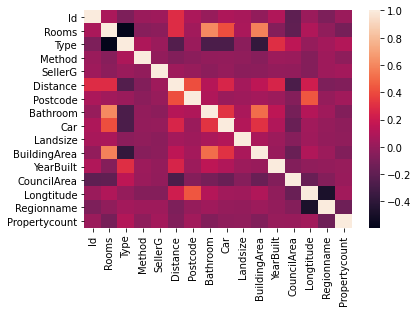

In [6]:
sns.heatmap(corr)

In [7]:
#Apply different models of your choice and then predict on the validation data and find the accuracy_score for this prediction.

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test,y_pred)
r2

0.6890580983875366

In [8]:
#Lasso
l1 = Lasso()
l1.fit(X_train,y_train)
l1_pred = l1.predict(X_test)
l1_r2 = r2_score(y_test,l1_pred)
l1_r2

0.6890578064895783

In [9]:
#Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(y_test,ridge_pred)
r2_ridge 



0.6889050415032762

In [10]:
#Cross Validation
cv_regressor = LinearRegression()
#score = -np.mean(cross_val_score(L1, X_train, y_train, scoring=scorer, cv=10))
score = cross_val_score(cv_regressor, X_train, y_train, cv=10)
mean_score = np.mean(score)
print("Mean Score" ,mean_score )
score

Mean Score 0.5803161421246121


array([0.6237558 , 0.57460975, 0.69185188, 0.68892513, 0.2923156 ,
       0.58173148, 0.66052876, 0.46638888, 0.6486981 , 0.57435605])

In [13]:
#Polynomial_Pipeline
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)


0.750825430551957


In [12]:
#Polynomial
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

regressor.fit(X_train_poly, y_train)
y_pred_poly = regressor.predict(X_test_poly)

r2 = r2_score(y_test,y_pred_poly)
r2

0.750825430551957

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
df_test = pd.read_csv("test.csv")
id = df_test["Id"]
df_test.shape

(2049, 16)

In [18]:
y_pred_test = model.predict(df_test)
print(y_pred_test)
y_pred_test.shape

[ 743968.45510101  859538.13716888 1841250.7289505  ...  856967.50306702
 2351499.46140289 1551471.07210541]


(2049,)

In [20]:
# Create a sample submission file
final_sub = pd.DataFrame({"Id": id, "Price": y_pred_test})
#final_sub

In [21]:
# Convert the sample submission file into a csv file
final_sub.to_csv("Melbourne_Submission.csv", index=False)
